In [1]:
# generate_interactive_plot.py
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [30, 40, 20, 10]
})

# Create an interactive line plot using Plotly Express
fig = px.line(data, x='Category', y='Value', title='Interactive Line Plot')  # Change px.scatter to px.line
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Value',
    hovermode='closest',  # Enables closest data point highlighting on hover
    template='plotly',  # Use the default plotly template
    title_x=0.5,  # Center the title
)

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/interactive_line_plot.html')  # Change the filename

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/interactive_line_plot.png', engine='kaleido')  # Change the filename


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_56955/746392873.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




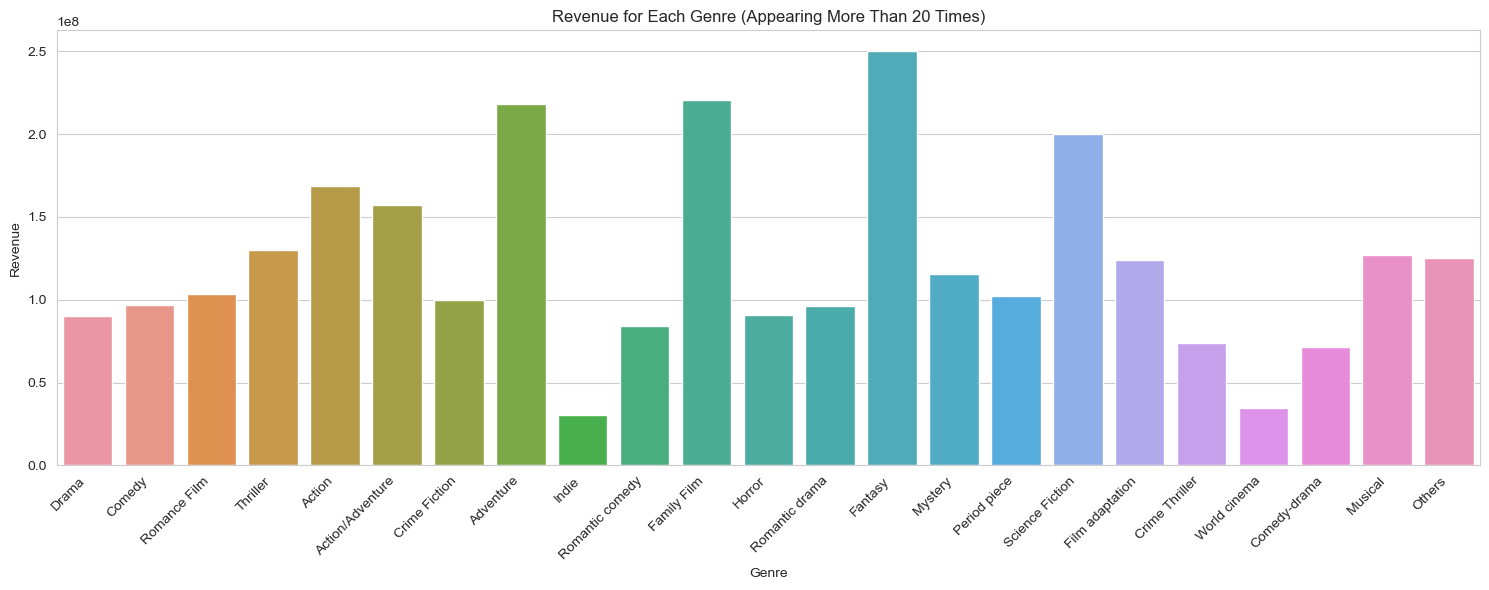

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Sample data (replace this with your actual data)
movie_genres_categories = pd.read_csv("../clean_Data/movie_genres_categories.csv")

# Set Seaborn style with a white background
sns.set_style("whitegrid")

# Set up a multi-plot grid
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Create a bar plot using Seaborn with the custom palette
sns.barplot(x='Genres', y='mean', data=movie_genres_categories, ci=95, capsize=.2, ax=ax)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue for Each Genre (Appearing More Than 20 Times)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



# Convert the Seaborn plot to a Plotly Express plot
fig = px.bar(movie_genres_categories, x='Genres', y='mean', title='Revenue for Each Genre',
             labels={'mean': 'Revenue'}, color_discrete_sequence=px.colors.qualitative.Set1)

# Customize the layout
fig.update_layout(xaxis_title='Genre', yaxis_title='Revenue', title_x=0.5)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45, tickmode='array')

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/genre_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/genre_revenue.png', engine='kaleido')
fig.show()


In [3]:
# Sample data (replace this with your actual data)
pos_neg_df = pd.read_csv("../clean_Data/pos_neg_revenue.csv")
columns_of_interest = ['percentage_of_positive_words', 'percentage_of_negative_words', 'percentage_of_neutral_words', 'Revenue_with_inflation']
data_to_plot = pos_neg_df[columns_of_interest]



/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_56955/3539010588.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




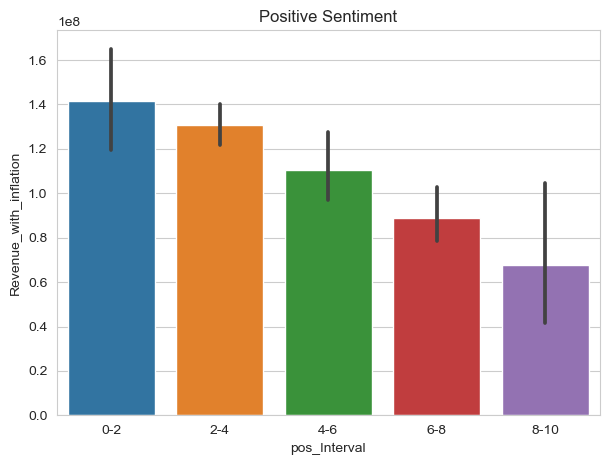

In [4]:
# Set up a multi-plot grid for Positive Sentiment
fig_pos, ax_pos = plt.subplots(figsize=(7, 5))
pos_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['pos_Interval'] = pd.cut(pos_neg_df['percentage_of_positive_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=pos_order)
sns.barplot(x='pos_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_pos, order=pos_order)
ax_pos.set_title('Positive Sentiment')
df = pos_neg_df.groupby('pos_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_pos_px = px.bar(df, x='pos_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"pos_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)
fig_pos_px.show()
# Customize the layout
fig_pos_px.update_layout(xaxis_title='Positive Sentiment Percentage', yaxis_title='Revenue', title_x=0.5)

# Save the plot as an HTML file (for interactive features)
fig_pos_px.write_html('assets/plots/pos_revenue_px.html')

# Display the Matplotlib plots
#plt.show()


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_56955/1697695708.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




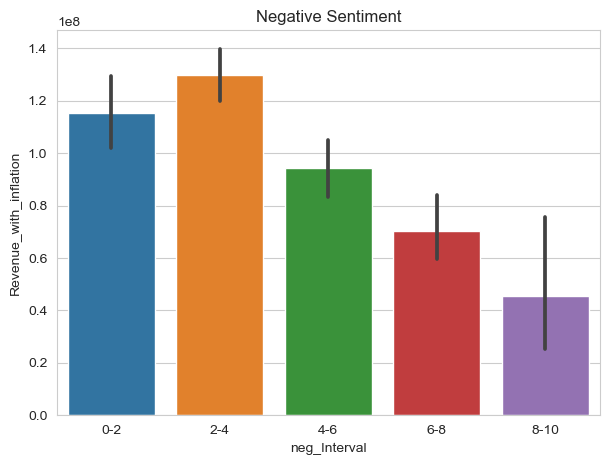

In [5]:
# Set up a multi-plot grid for Negative Sentiment
fig_neg, ax_neg = plt.subplots(figsize=(7, 5))
neg_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['neg_Interval'] = pd.cut(pos_neg_df['percentage_of_negative_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=neg_order)
sns.barplot(x='neg_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_neg, order=neg_order)
ax_neg.set_title('Negative Sentiment')

df = pos_neg_df.groupby('neg_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_neg_px = px.bar(df, x='neg_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"neg_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)

# Customize the layout
fig_neg_px.update_layout(xaxis_title='Negative Sentiment Percentage', yaxis_title='Revenue', title_x=0.5)

# Save the plot as an HTML file (for interactive features)
fig_neg_px.write_html('assets/plots/neg_revenue_px.html')

# Save the plot as an image file (e.g., PNG)
fig_pos_px.write_image('assets/plots/pos_revenue_px.png', engine='kaleido')
fig_neg_px.write_image('assets/plots/neg_revenue_px.png', engine='kaleido')
fig_neg_px.show()

/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_56955/56814542.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




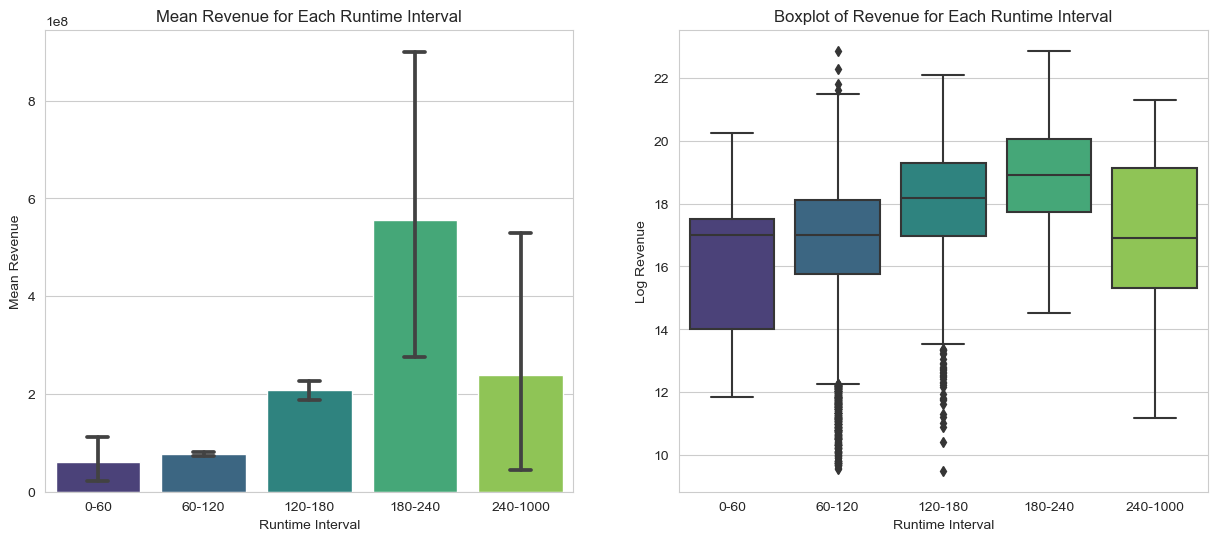

In [6]:
# Sample data (replace this with your actual data)
movie_runtime = pd.read_csv("../clean_Data/movie_runtime.csv")

pos_order = ['0-60', '60-120', '120-180', '180-240', '240-1000']
# Create a new column for intervals
movie_runtime['Interval'] = pd.cut(movie_runtime['movie_runtime'], bins=[0, 60, 120, 180, 240, 1000], labels=pos_order)
df = movie_runtime.groupby('Interval')['Revenue_with_inflation'].mean().reset_index()

# Set up a multi-plot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the mean revenue with error bars and 95% confidence interval
sns.barplot(x='Interval', y='Revenue_with_inflation', data=movie_runtime, ci=95, capsize=.2, palette='viridis', ax=ax1)
ax1.set_title('Mean Revenue for Each Runtime Interval')
ax1.set_xlabel('Runtime Interval')
ax1.set_ylabel('Mean Revenue')

# Plot the boxplot
sns.boxplot(x='Interval', y='log_revenues', data=movie_runtime, palette='viridis', ax=ax2)
ax2.set_title('Boxplot of Revenue for Each Runtime Interval')
ax2.set_xlabel('Runtime Interval')
ax2.set_ylabel('Log Revenue')

# Display the Matplotlib plot (optional)
#plt.show()

# Convert the Seaborn plot to a Plotly Express bar plot
fig_runtime_mean = px.bar(df, x='Interval', y='Revenue_with_inflation', text_auto= '.2s', title='Mean Revenue for Each Runtime Interval',
                          labels={'Revenue with inflation': 'Mean Revenue'}, 
                          category_orders={"Interval": pos_order},
                          color='Interval')
fig_runtime_mean.show()


# Customize the layout
fig_runtime_mean.update_layout(xaxis_title='Runtime Interval', yaxis_title='Mean Revenue', title_x=0.5)

# Save the plot as an HTML file (for interactive features)
fig_runtime_mean.write_html('assets/plots/runtime_mean_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig_runtime_mean.write_image('assets/plots/runtime_mean_revenue.png', engine='kaleido')

# Convert the Seaborn plot to a Plotly Express box plot
fig_runtime_box = px.box(movie_runtime, x='Interval', y='log_revenues', title='Boxplot of Revenue for Each Runtime Interval',
                         labels={'log_revenues': 'Log Revenue'},
                          category_orders={"Interval": pos_order},
                          color='Interval')

# Customize the layout
fig_runtime_box.update_layout(xaxis_title='Runtime Interval', yaxis_title='Log Revenue', title_x=0.5)

# Save the plot as an HTML file (for interactive features)
fig_runtime_box.write_html('assets/plots/runtime_box_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig_runtime_box.write_image('assets/plots/runtime_box_revenue.png', engine='kaleido')

In [7]:
from PIL import Image

def extract_top_left_pixel_color(image_path):
    try:
        # Open the image file
        img = Image.open(image_path)

        # Get the RGB values of the top-left corner pixel
        top_left_pixel_color = img.getpixel((0, 0))

        # Convert RGB values to hexadecimal representation
        hex_color = "#{:02x}{:02x}{:02x}".format(*top_left_pixel_color)

        return hex_color
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage:
image_path = "images/Capture d’écran 2023-12-17 à 15.50.48.png"  # Replace with the actual path to your image file
hex_color = extract_top_left_pixel_color(image_path)

if hex_color:
    print(f"Hexadecimal color of the top-left corner pixel: {hex_color}")
else:
    print("Failed to extract color.")


Hexadecimal color of the top-left corner pixel: #252941
